In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Introduction

## This Census data focuses on sales data of various business industries throughout the United States, from 1992 to 2021. We focused on the last year and five months of the data(January 2020 to May 2021) in order to examine how sales faired during the coronavirus pandemic.

## Hypothesis: We hypothesize that the amount of overall sales will decrease when the pandemic became widespread in 2020, and many businesses were forced to close and/or shift their business model.

# Methods

## All of the data had to be separated into two csvs' using google sheets. From there, both csvs were merged together. Results were then filtered by time period and the amount of sales that occurred within that time period.

In [119]:
df = pd.read_csv('MARTS-mf.csv')
df

,per_idx,cat_idx,dt_idx,et_idx,geo_idx,is_adj,val
0,1,5,1,0,1,0,130683.0
1,1,5,1,0,1,1,146925.0
2,1,6,1,0,1,0,29811.0
3,1,6,1,0,1,1,33478.0
4,1,7,1,0,1,0,26788.0
...,...,...,...,...,...,...,...
48309,353,19,2,0,1,0,5.1
48310,353,20,2,0,1,0,-0.2
48311,353,21,2,0,1,0,6.1
48312,353,3,2,0,1,0,2.8


In [120]:
time_periods = pd.read_csv('TIME PERIODS.CSV')


time_periods

,per_idx,per_name
0,1,Jan1992
1,2,Feb1992
2,3,Mar1992
3,4,Apr1992
4,5,May1992
...,...,...
348,349,Jan2021
349,350,Feb2021
350,351,Mar2021
351,352,Apr2021


In [121]:
categories = pd.read_csv('Categories.csv')
categories

,cat_idx,cat_code,cat_desc,cat_indent
0,1,44X72,44X72: Retail Trade and Food Services,0
1,2,44Y72,"44Y72: Retail Trade and Food Services, ex Auto",0
2,3,44Z72,"44Z72: Retail Trade and Food Services, ex Gas",0
3,4,44W72,"44W72: Retail Trade and Food Services, ex Auto...",0
4,5,44000,44000: Retail Trade,0
5,6,441,441: Motor Vehicle and Parts Dealers,0
6,7,441X,"4411,4412: Auto and Other Motor Vehicles",0
7,8,442,442: Furniture and Home Furnishings Stores,0
8,9,443,443: Electronics and Appliance Stores,0
9,10,444,444: Building Mat. and Garden Equip. and Suppl...,0


In [122]:
result = pd.merge(df,time_periods,on='per_idx')
result

,per_idx,cat_idx,dt_idx,et_idx,geo_idx,is_adj,val,per_name
0,1,5,1,0,1,0,130683.0,Jan1992
1,1,5,1,0,1,1,146925.0,Jan1992
2,1,6,1,0,1,0,29811.0,Jan1992
3,1,6,1,0,1,1,33478.0,Jan1992
4,1,7,1,0,1,0,26788.0,Jan1992
...,...,...,...,...,...,...,...,...
48309,353,19,2,0,1,0,5.1,May2021
48310,353,20,2,0,1,0,-0.2,May2021
48311,353,21,2,0,1,0,6.1,May2021
48312,353,3,2,0,1,0,2.8,May2021


In [123]:
result = pd.merge(result,categories[['cat_idx','cat_desc']],on='cat_idx')
result

,per_idx,cat_idx,dt_idx,et_idx,geo_idx,is_adj,val,per_name,cat_desc
0,1,5,1,0,1,0,130683.0,Jan1992,44000: Retail Trade
1,1,5,1,0,1,1,146925.0,Jan1992,44000: Retail Trade
2,2,5,1,0,1,0,131244.0,Feb1992,44000: Retail Trade
3,2,5,1,0,1,1,147223.0,Feb1992,44000: Retail Trade
4,2,5,2,0,1,1,0.2,Feb1992,44000: Retail Trade
...,...,...,...,...,...,...,...,...,...
48309,353,21,0,1,1,0,3.5,May2021,722: Food Services and Drinking Places
48310,353,21,0,2,1,1,1.0,May2021,722: Food Services and Drinking Places
48311,353,21,0,2,1,0,1.0,May2021,722: Food Services and Drinking Places
48312,353,21,2,0,1,1,1.8,May2021,722: Food Services and Drinking Places


In [124]:
result.drop(columns=['geo_idx','et_idx'])

,per_idx,cat_idx,dt_idx,is_adj,val,per_name,cat_desc
0,1,5,1,0,130683.0,Jan1992,44000: Retail Trade
1,1,5,1,1,146925.0,Jan1992,44000: Retail Trade
2,2,5,1,0,131244.0,Feb1992,44000: Retail Trade
3,2,5,1,1,147223.0,Feb1992,44000: Retail Trade
4,2,5,2,1,0.2,Feb1992,44000: Retail Trade
...,...,...,...,...,...,...,...
48309,353,21,0,0,3.5,May2021,722: Food Services and Drinking Places
48310,353,21,0,1,1.0,May2021,722: Food Services and Drinking Places
48311,353,21,0,0,1.0,May2021,722: Food Services and Drinking Places
48312,353,21,2,1,1.8,May2021,722: Food Services and Drinking Places


## Time period (2020-2021) values were isolated here by per_idx.

In [125]:
result = result[result["per_idx"] > 336]
result

,per_idx,cat_idx,dt_idx,et_idx,geo_idx,is_adj,val,per_name,cat_desc
2242,337,5,1,0,1,0,418734.0,Jan2020,44000: Retail Trade
2243,337,5,1,0,1,1,460586.0,Jan2020,44000: Retail Trade
2244,337,5,0,1,1,1,0.5,Jan2020,44000: Retail Trade
2245,337,5,0,1,1,0,0.5,Jan2020,44000: Retail Trade
2246,337,5,0,2,1,1,0.1,Jan2020,44000: Retail Trade
...,...,...,...,...,...,...,...,...,...
48309,353,21,0,1,1,0,3.5,May2021,722: Food Services and Drinking Places
48310,353,21,0,2,1,1,1.0,May2021,722: Food Services and Drinking Places
48311,353,21,0,2,1,0,1.0,May2021,722: Food Services and Drinking Places
48312,353,21,2,0,1,1,1.8,May2021,722: Food Services and Drinking Places


## Business type was isolated here by the category index(cat_idx).

In [126]:
result = result[(result["cat_idx"] == 1) | (result["cat_idx"] == 5) | (result["cat_idx"] == 11) | (result["cat_idx"] == 12) 
 | (result["cat_idx"] == 13) | (result["cat_idx"] == 15) | (result["cat_idx"] == 17) | (result["cat_idx"] == 20) | (result["cat_idx"] == 21)]
result

,per_idx,cat_idx,dt_idx,et_idx,geo_idx,is_adj,val,per_name,cat_desc
2242,337,5,1,0,1,0,418734.0,Jan2020,44000: Retail Trade
2243,337,5,1,0,1,1,460586.0,Jan2020,44000: Retail Trade
2244,337,5,0,1,1,1,0.5,Jan2020,44000: Retail Trade
2245,337,5,0,1,1,0,0.5,Jan2020,44000: Retail Trade
2246,337,5,0,2,1,1,0.1,Jan2020,44000: Retail Trade
...,...,...,...,...,...,...,...,...,...
48309,353,21,0,1,1,0,3.5,May2021,722: Food Services and Drinking Places
48310,353,21,0,2,1,1,1.0,May2021,722: Food Services and Drinking Places
48311,353,21,0,2,1,0,1.0,May2021,722: Food Services and Drinking Places
48312,353,21,2,0,1,1,1.8,May2021,722: Food Services and Drinking Places


In [127]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 2242 to 48313
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   per_idx   1224 non-null   int64  
 1   cat_idx   1224 non-null   int64  
 2   dt_idx    1224 non-null   int64  
 3   et_idx    1224 non-null   int64  
 4   geo_idx   1224 non-null   int64  
 5   is_adj    1224 non-null   int64  
 6   val       1224 non-null   float64
 7   per_name  1224 non-null   object 
 8   cat_desc  1224 non-null   object 
dtypes: float64(1), int64(6), object(2)
memory usage: 95.6+ KB


# The sum of values was taken for each type of business from January 2020 until May 2021.

In [128]:
grouped_df = result.groupby(['per_name','cat_desc'], as_index=False,sort=False)['val'].sum()
grouped_df

,per_name,cat_desc,val
0,Jan2020,44000: Retail Trade,879302.1
1,Feb2020,44000: Retail Trade,875121.4
2,Mar2020,44000: Retail Trade,864807.7
3,Apr2020,44000: Retail Trade,757078.7
4,May2020,44000: Retail Trade,906865.4
...,...,...,...
148,Jan2021,722: Food Services and Drinking Places,109081.2
149,Feb2021,722: Food Services and Drinking Places,106141.0
150,Mar2021,722: Food Services and Drinking Places,128443.0
151,Apr2021,722: Food Services and Drinking Places,133328.7


# Each group was set to a variable in order to create the graphs.

In [130]:
time = grouped_df["per_name"].unique()
time

array(['Jan2020', 'Feb2020', 'Mar2020', 'Apr2020', 'May2020', 'Jun2020',
       'Jul2020', 'Aug2020', 'Sep2020', 'Oct2020', 'Nov2020', 'Dec2020',
       'Jan2021', 'Feb2021', 'Mar2021', 'Apr2021', 'May2021'],
      dtype=object)

In [131]:
cat = grouped_df["cat_desc"].unique()
cat

array(['44000: Retail Trade', '445: Food and Beverage Stores',
       '4451: Grocery Stores', '446: Health and Personal Care Stores',
       '448: Clothing and Clothing Access. Stores',
       '44X72: Retail Trade and Food Services',
       '452: General Merchandise Stores', '454: Nonstore Retailers',
       '722: Food Services and Drinking Places'], dtype=object)

# Analysis Section 

## Retail Trade, and Retail Trade and Food Services entities had the highest amount of sales overall, as evidenced in the following line graph. The remainder of the businesses, achieved an amount of sales that were below a .2 value. There appears to be a .6 gap in sales values between Retail Trade, Retail Trade and Food Services, and the rest of the business types.

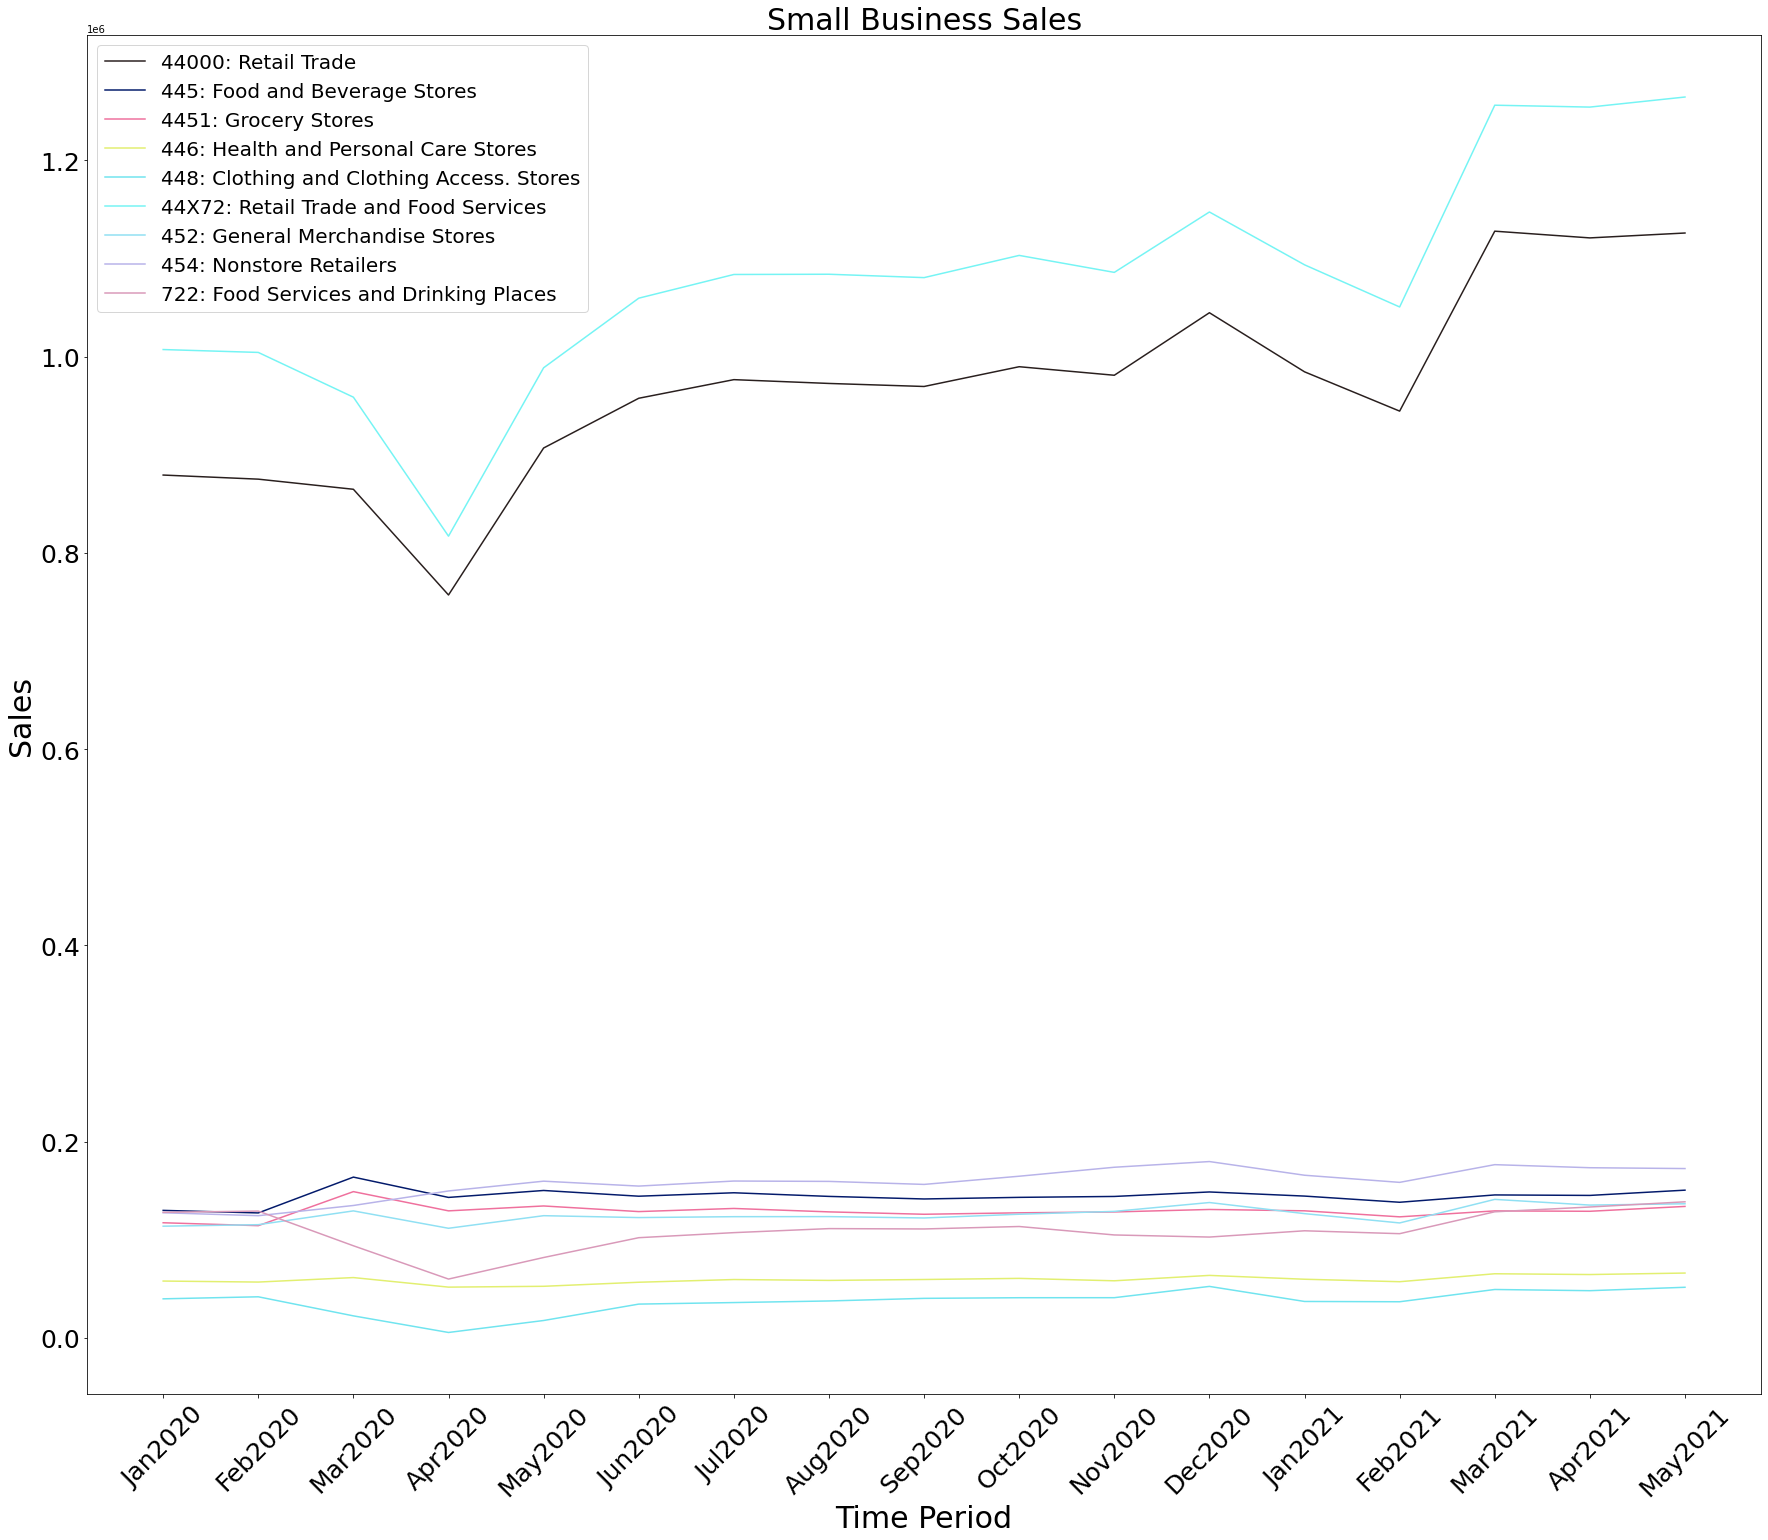

In [209]:
plt.figure(figsize=(30,25))
color_list = ['#291F1E','#031A6B','#EF709D','#E2EF70','#70E4EF','#75F4F4','#90E0F3','#B8B3E9','#D999B9','#D17B88']
for idx,category in enumerate(cat):
     x = grouped_df["per_name"].unique()
     y = grouped_df[grouped_df["cat_desc"] == category]["val"]
     plt.xlabel("Time Period", fontsize=30)  
     plt.ylabel("Sales", fontsize=30)  
     plt.title("Small Business Sales", fontsize=30)  
     plt.plot(x,y, label= category, color = color_list[idx])
plt.xticks(fontsize=25) 
plt.xticks(rotation=45)
plt.yticks(fontsize=25) 
plt.legend(prop={'size': 20})


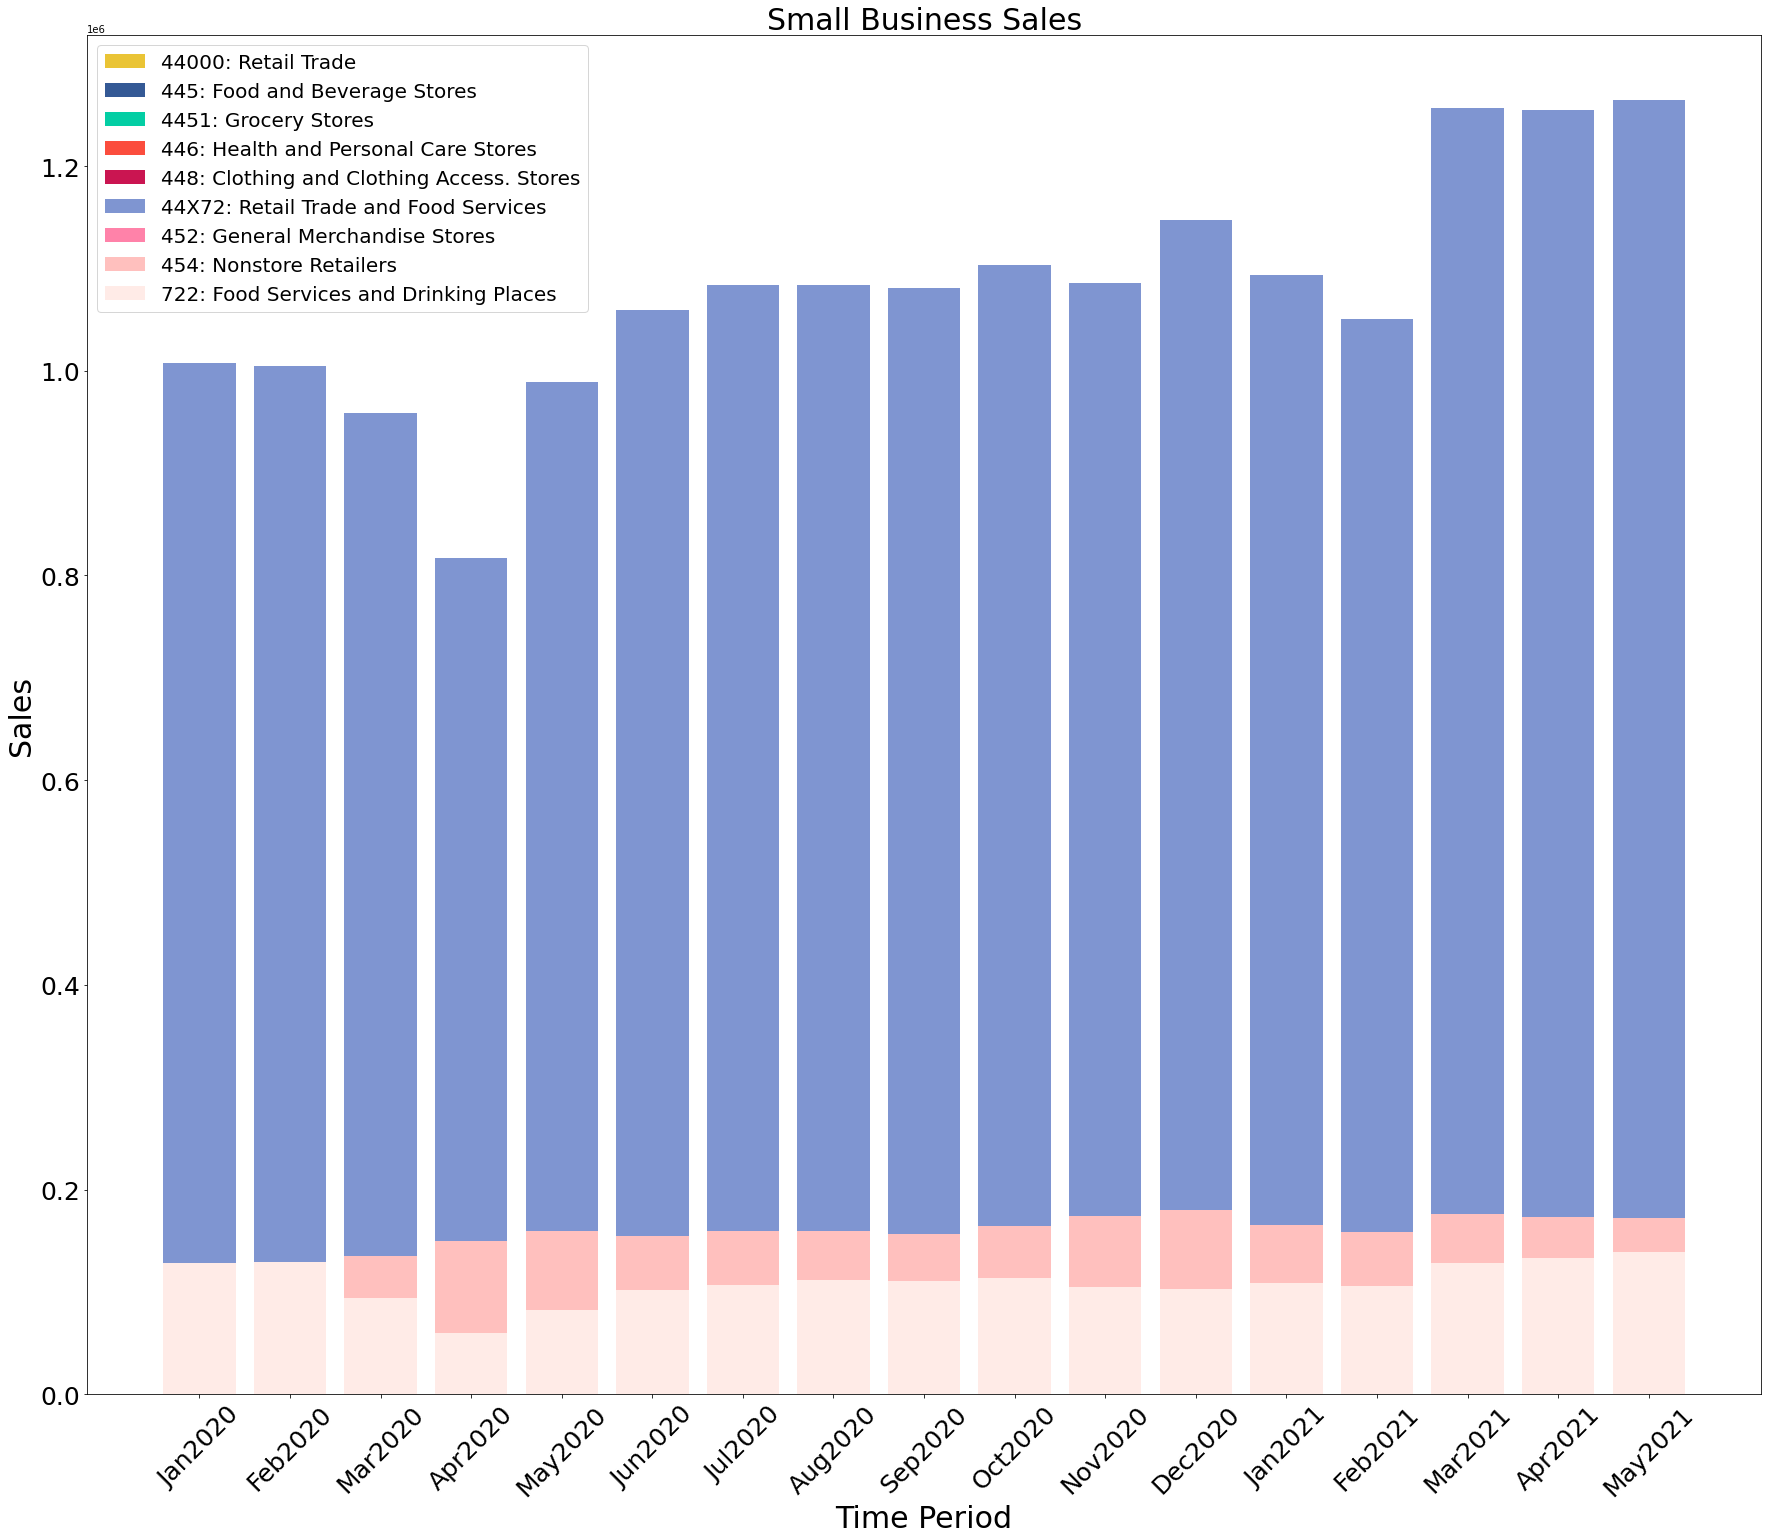

In [207]:
plt.figure(figsize=(30,25))
color_list =["#EAC435","#345995", "#03CEA4","#FB4D3D", "#CA1551","#7F95D1","#FF82A9","#FFC0BE","#FFEBE7","#33032F"]
for idx,category in enumerate(cat):
     x = grouped_df["per_name"].unique()
     y = grouped_df[grouped_df["cat_desc"] == category]["val"]
     plt.xlabel("Time Period", fontsize=30)  
     plt.ylabel("Sales", fontsize=30)  
     plt.title("Small Business Sales", fontsize=30)  
     plt.bar(x,y, label= category, color = color_list[idx])
plt.xticks(fontsize=25) 
plt.xticks(rotation=45)
plt.yticks(fontsize=25) 
plt.legend(prop={'size': 20})

## It appears that Retail Trade and Food Services industry had the highest amount of sales throughout the pandemic, but saw a steep decline in the months of March and April in 2020.

In [196]:
grouped_df[grouped_df['cat_desc'] == '44X72: Retail Trade and Food Services']

,per_name,cat_desc,val
85,Jan2020,44X72: Retail Trade and Food Services,1007215.0
86,Feb2020,44X72: Retail Trade and Food Services,1004278.2
87,Mar2020,44X72: Retail Trade and Food Services,958667.2
88,Apr2020,44X72: Retail Trade and Food Services,817018.4
89,May2020,44X72: Retail Trade and Food Services,988631.0
90,Jun2020,44X72: Retail Trade and Food Services,1059554.3
91,Jul2020,44X72: Retail Trade and Food Services,1083717.1
92,Aug2020,44X72: Retail Trade and Food Services,1083954.9
93,Sep2020,44X72: Retail Trade and Food Services,1080516.0
94,Oct2020,44X72: Retail Trade and Food Services,1103157.9


## Sales for Food Services and Drinking Places took a dramatic nosedive in March and April of 2020, but began increasing in May of 2020, then fluctuating in the proceeding months.

In [194]:
grouped_df[grouped_df['cat_desc'] == '722: Food Services and Drinking Places']

,per_name,cat_desc,val
136,Jan2020,722: Food Services and Drinking Places,127911.9
137,Feb2020,722: Food Services and Drinking Places,129165.9
138,Mar2020,722: Food Services and Drinking Places,93818.9
139,Apr2020,722: Food Services and Drinking Places,59881.6
140,May2020,722: Food Services and Drinking Places,81845.0
141,Jun2020,722: Food Services and Drinking Places,102044.1
142,Jul2020,722: Food Services and Drinking Places,107196.6
143,Aug2020,722: Food Services and Drinking Places,111303.5
144,Sep2020,722: Food Services and Drinking Places,110948.0
145,Oct2020,722: Food Services and Drinking Places,113450.7


## In Food and Beverage Stores, sale values appeared to hover around similiar values. March and April 2020 values seemed to increase from January and February of that year then fluctuate around the 140,000.0 mark, finishing at an increased value of 150,486.2 in May of 2021.

In [198]:
grouped_df[grouped_df['cat_desc'] == '445: Food and Beverage Stores']

,per_name,cat_desc,val
17,Jan2020,445: Food and Beverage Stores,129881.3
18,Feb2020,445: Food and Beverage Stores,127286.2
19,Mar2020,445: Food and Beverage Stores,163792.6
20,Apr2020,445: Food and Beverage Stores,143089.2
21,May2020,445: Food and Beverage Stores,150163.9
22,Jun2020,445: Food and Beverage Stores,144331.3
23,Jul2020,445: Food and Beverage Stores,147825.7
24,Aug2020,445: Food and Beverage Stores,144129.7
25,Sep2020,445: Food and Beverage Stores,141513.0
26,Oct2020,445: Food and Beverage Stores,143152.0


## Sales beginning in January 2020 in Health and Personal Stores, started off small to begin with, and hovered around the same values throughout the year into May 2021.

In [200]:
grouped_df[grouped_df['cat_desc'] == '446: Health and Personal Care Stores']

,per_name,cat_desc,val
51,Jan2020,446: Health and Personal Care Stores,57857.5
52,Feb2020,446: Health and Personal Care Stores,56821.3
53,Mar2020,446: Health and Personal Care Stores,61401.4
54,Apr2020,446: Health and Personal Care Stores,51656.2
55,May2020,446: Health and Personal Care Stores,52510.7
56,Jun2020,446: Health and Personal Care Stores,56636.8
57,Jul2020,446: Health and Personal Care Stores,59399.4
58,Aug2020,446: Health and Personal Care Stores,58519.9
59,Sep2020,446: Health and Personal Care Stores,59442.8
60,Oct2020,446: Health and Personal Care Stores,60581.3


## Sales within Clothing and Clothing Accessory Stores  went into a steep decline of 16,930.2 to 5447.5 in April of 2020, then increased by almost half in the upcoming months(June to August 2020), steadily increasing until January of 2021, where it fell by 15,340.2 . From January of 2021 to May of 2021, clothing store sales increased by a total of approximately 14,000.0.

In [201]:
grouped_df[grouped_df['cat_desc'] == '448: Clothing and Clothing Access. Stores']

,per_name,cat_desc,val
68,Jan2020,448: Clothing and Clothing Access. Stores,39739.9
69,Feb2020,448: Clothing and Clothing Access. Stores,41811.3
70,Mar2020,448: Clothing and Clothing Access. Stores,22377.7
71,Apr2020,448: Clothing and Clothing Access. Stores,5447.5
72,May2020,448: Clothing and Clothing Access. Stores,17643.6
73,Jun2020,448: Clothing and Clothing Access. Stores,34364.0
74,Jul2020,448: Clothing and Clothing Access. Stores,35933.7
75,Aug2020,448: Clothing and Clothing Access. Stores,37562.7
76,Sep2020,448: Clothing and Clothing Access. Stores,40221.3
77,Oct2020,448: Clothing and Clothing Access. Stores,40864.3


## General Merchandise Stores sales remained steady overall, but showed a decrease between the months of March 2020 and April 2020 of 17,720.9. Sales fluctuated in the proceeding months, decreasing again in the months between December 2020 and February 2020.

In [202]:
grouped_df[grouped_df['cat_desc'] == '452: General Merchandise Stores']

,per_name,cat_desc,val
102,Jan2020,452: General Merchandise Stores,113767.5
103,Feb2020,452: General Merchandise Stores,115299.6
104,Mar2020,452: General Merchandise Stores,129360.8
105,Apr2020,452: General Merchandise Stores,111639.9
106,May2020,452: General Merchandise Stores,124478.1
107,Jun2020,452: General Merchandise Stores,122549.7
108,Jul2020,452: General Merchandise Stores,123460.7
109,Aug2020,452: General Merchandise Stores,123533.3
110,Sep2020,452: General Merchandise Stores,122152.3
111,Oct2020,452: General Merchandise Stores,125956.8


## Nonstore Retailers appears to have increased sales overall from January 2020, its highest point of sales being December of 2020, with a value of 179640.4. 

In [203]:
grouped_df[grouped_df['cat_desc'] == '454: Nonstore Retailers']

,per_name,cat_desc,val
119,Jan2020,454: Nonstore Retailers,127458.9
120,Feb2020,454: Nonstore Retailers,124463.6
121,Mar2020,454: Nonstore Retailers,134868.1
122,Apr2020,454: Nonstore Retailers,149676.9
123,May2020,454: Nonstore Retailers,159645.1
124,Jun2020,454: Nonstore Retailers,154639.6
125,Jul2020,454: Nonstore Retailers,159789.4
126,Aug2020,454: Nonstore Retailers,159419.1
127,Sep2020,454: Nonstore Retailers,156348.1
128,Oct2020,454: Nonstore Retailers,164695.6


# Results

## My findings indicate that overall Retail Trade, Retail Trade and Food Services had the highest amount of sales in the past year(January 2020 to May 2021). One commonality among many of the different business types is that in the months between March 2020 and April 2020, sales saw a decline. Another commonality is that some of the business types also saw a decline in sales between the months of December 2020 and January 2021.

# Conclusion

## As expected, the outbreak of the coronavirus pandemic and the subsequent lockdown had a major impact on sales, especially in the months of March and April of 2020. The industries that faired the best was Retail, Retail Trade and Food Services while Health and Personal Care stores faired the least. There was a significant difference between the Retail, Retail Trade and Food Services and the other business industries covered in this study. Perhaps more investigation can be done on why there was such a significant gap between those industries.

# Appendix

### Data collected from the United States Census Bureau: https://www.census.gov/econ/currentdata/datasets/index 